# Enegry Efficient Dataset
<b>Author: </b> Yash Sharma <br />

<b>Source: </b> UCI Machine Learning Repo

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Set Information:

	We perform energy analysis using 12 different building shapes simulated in Ecotect. 
	The buildings differ with respect to the glazing area, the glazing area distribution, 
	and the orientation, amongst other parameters. 
	
	We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. 
	The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. 
	It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

## Attribute Information:

	The dataset contains 
		- 8 attributes (or features, denoted by X1...X8)
 		- 2 responses (or outcomes, denoted by y1 and y2) 

	The aim is to use the 8 features to predict each of the 2 responses. 

### Loading Dataset

In [2]:
# Load Excel File
df = pd.ExcelFile('ENB2012_data.xlsx', sheetname=None)

# Convert the Sheet to DataFrame
df = df.parse()

In [3]:
# Shape of the Data i.e Number of Rows and Number of Columns
df.shape

(768, 10)

In [4]:
# First 5 Rows of the Dataset
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
# Last 5 Rows
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


## Information about Features and Label

### Features
    X1	Relative Compactness 
    X2	Surface Area 
    X3	Wall Area 
    X4	Roof Area 
    X5	Overall Height 
    X6	Orientation 
    X7	Glazing Area 
    X8	Glazing Area Distribution

### Label
    y1	Heating Load 
    y2	Cooling Load

### Missing Values

In [6]:
# Checking wether we have some missing value in our DataFrame
df.isnull().values.any()

False

## Correlation b/w Features

In [7]:
corr = df.drop(['Y1','Y2'], axis=1).corr()

In [8]:
# Correlation Matrix
corr

,X1,X2,X3,X4,X5,X6,X7,X8
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.0,1.283986e-17,1.764620e-17
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.0,1.318356e-16,-3.558613e-16
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.0,-7.969726e-19,0.000000e+00
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.0,-1.381805e-16,-1.079129e-16
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.0,1.861418e-18,0.000000e+00
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.0,1.000000e+00,2.129642e-01
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.0,2.129642e-01,1.000000e+00


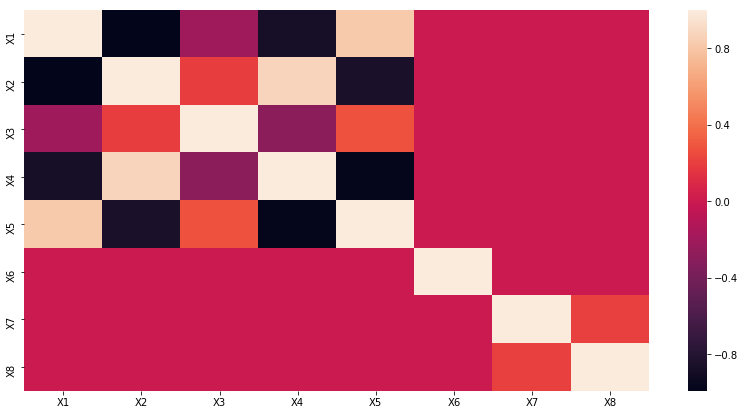

In [9]:
# Let's Plot this Correlation Matrix using Seaborn
plt.figure(figsize=(14, 7))

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

plt.show()

No Correlation b/w Features.

## Feature Distribution

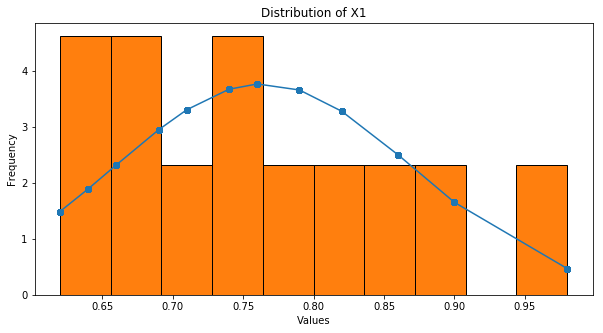

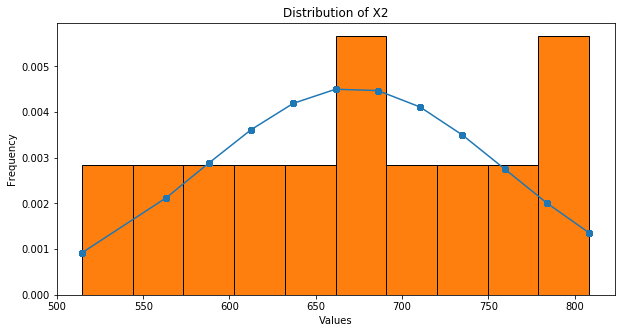

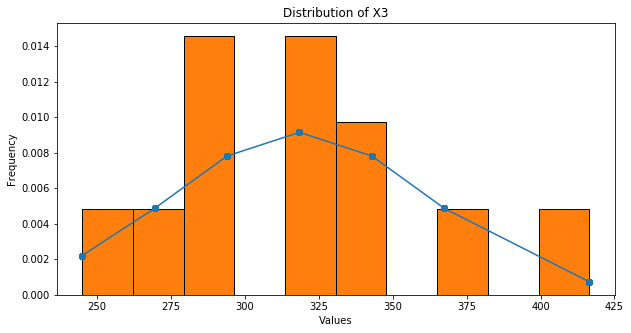

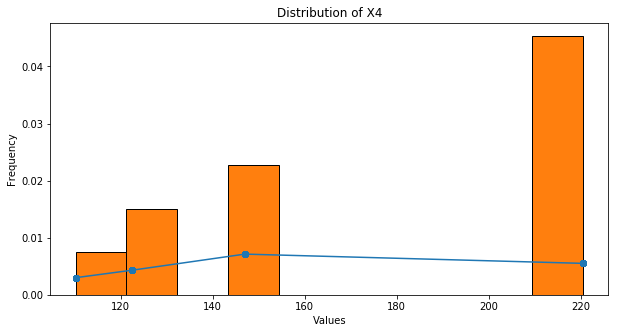

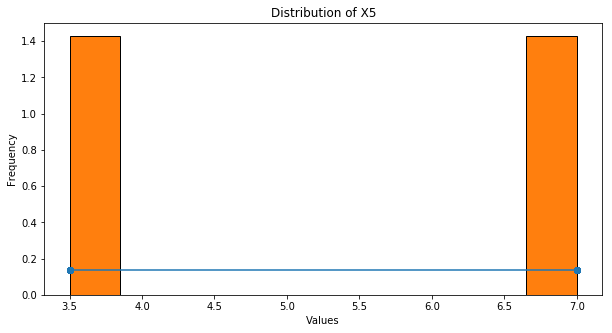

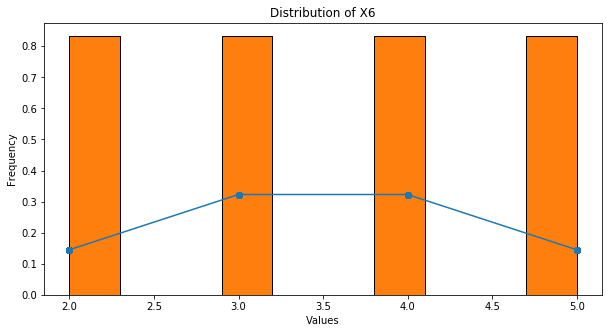

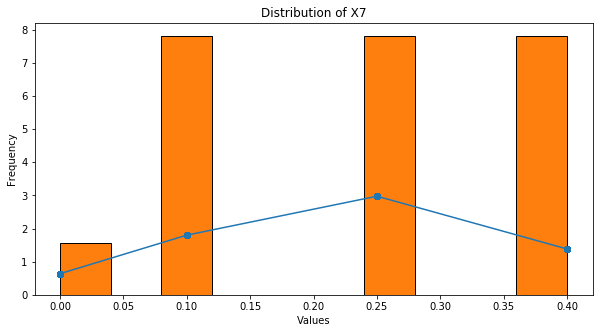

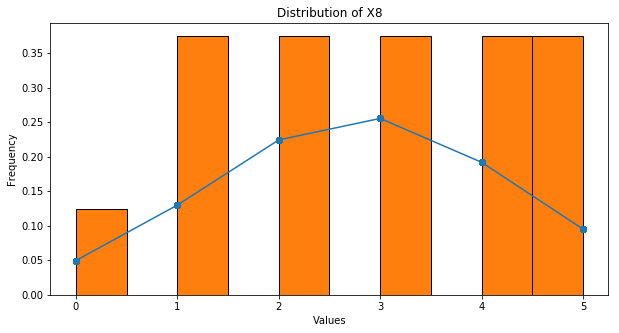

In [10]:
for column_name in df.drop(['Y1', 'Y2'], axis=1).columns:
    h = sorted(df[column_name])

    # Normalized Fitted Line
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))
    
    plt.figure(figsize=(10, 5))
    
    plt.title("Distribution of {}".format(column_name))
    
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.plot(h, fit, '-o')
    plt.hist(h, normed=True, edgecolor='black')

    plt.show()

It seems like X2 is ~Normally Distributed.

# Linear Regression
We have to predict Heating Load and Cooling Load giving the Features.<br />
We are gonna use Linear Regression Model present in <b>Sklearn Library</b>.<br />

It's a very simple but powerful model.

## Build a Model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import sklearn.metrics as met

### Split our data into training and testing.

In [12]:
X = df.drop(['Y1', 'Y2'], axis=1)
y = df[['Y1', 'Y2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression
We are using LinearRegression Model to predict the value of Head Load (Y1) & Cooling Load (Y2) giving the Features (X1 - X6)

In [13]:
# Initialize the Classifier
clf = LinearRegression()

In [14]:
# Fit the Model with Training Data
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Predict the accuracy score with Testing Data
predict = clf.predict(X_test)

### Metrices
We are using Regression Metrices for evaluating our model

In [16]:
# R^2 (coefficient of determination) Score
# Best possible score is 1.0 
met.r2_score(y_pred=predict, y_true=y_test)

0.89923607872400069

Our Model Score is 0.89 that's an great score.